## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Data

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Cleaning

In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

``no null-value.``

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Feature Engineering

In [8]:
Male = pd.get_dummies(df['sex'], drop_first=True)
df = pd.concat([df, Male], axis = 1)
df.head()

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,False
1,18,male,33.770,1,no,southeast,1725.55230,True
2,28,male,33.000,3,no,southeast,4449.46200,True
3,33,male,22.705,0,no,northwest,21984.47061,True
4,32,male,28.880,0,no,northwest,3866.85520,True


In [9]:
Male

,male
0,False
1,True
2,True
3,True
4,True
...,...
1333,True
1334,False
1335,False
1336,False


In [10]:
Smoker = pd.get_dummies(df['smoker'], drop_first=True)
df = pd.concat([df, Smoker], axis = 1)
df.head()

,age,sex,bmi,children,smoker,region,charges,male,yes
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False


In [11]:
df = df.rename(columns = {"yes" : "Smoker"})
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False


In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False


In [13]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [14]:
Region = pd.get_dummies(df['region'], drop_first=True)
df = pd.concat([df, Region], axis = 1)
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,False,True,False,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False,False,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False,False,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False,True,False,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False,True,False,False


## Exploratory Analysis

#### a) Distribution of 'Sex' Parameter:

In [15]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

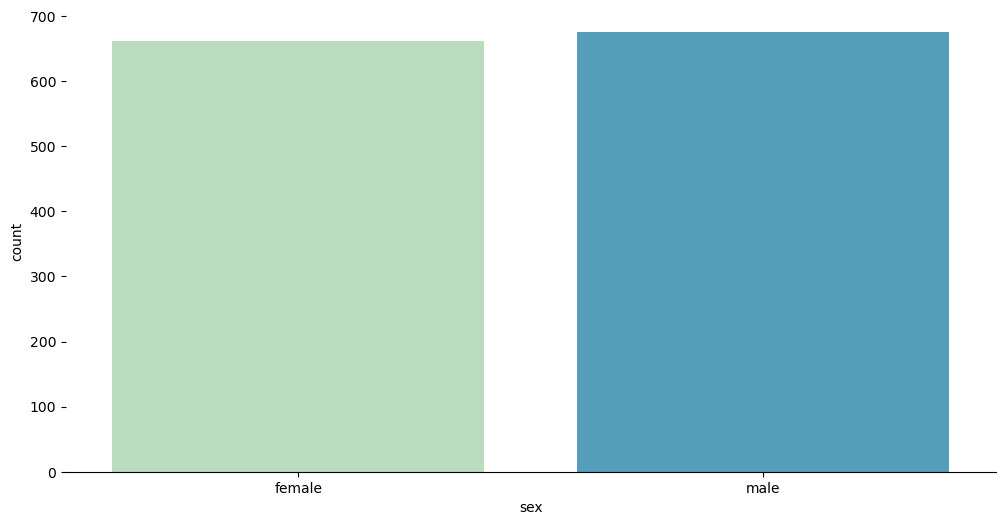

In [16]:
plt.figure(figsize=(12, 6)) #size of graph
sns.countplot(x = "sex", data  =df, palette = "GnBu") #Green-Blue color.
sns.despine(left = True) # to remove outer box in chart

#### b) Relationship of Smoking and gender to Changes

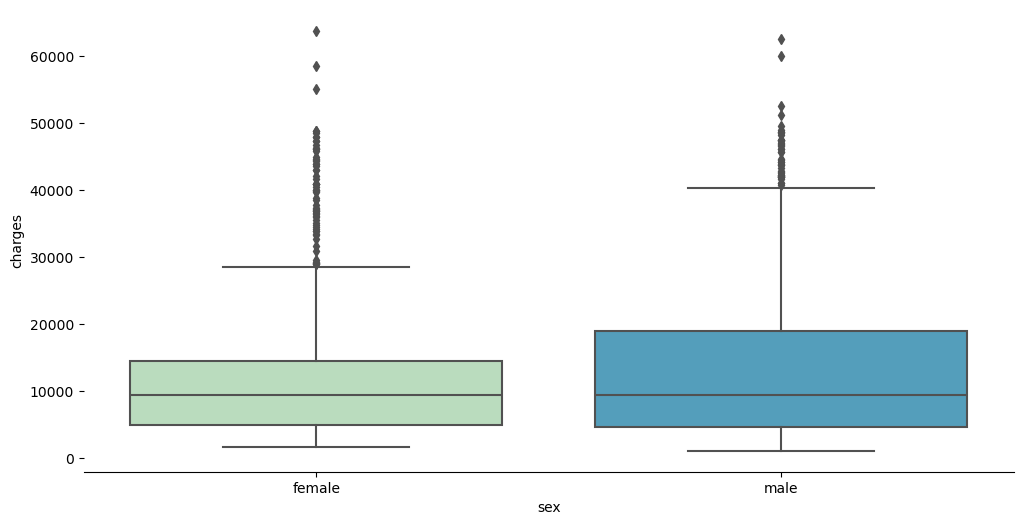

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x = "sex", y = "charges", data  =df, palette = "GnBu") 
sns.despine(left = True) 

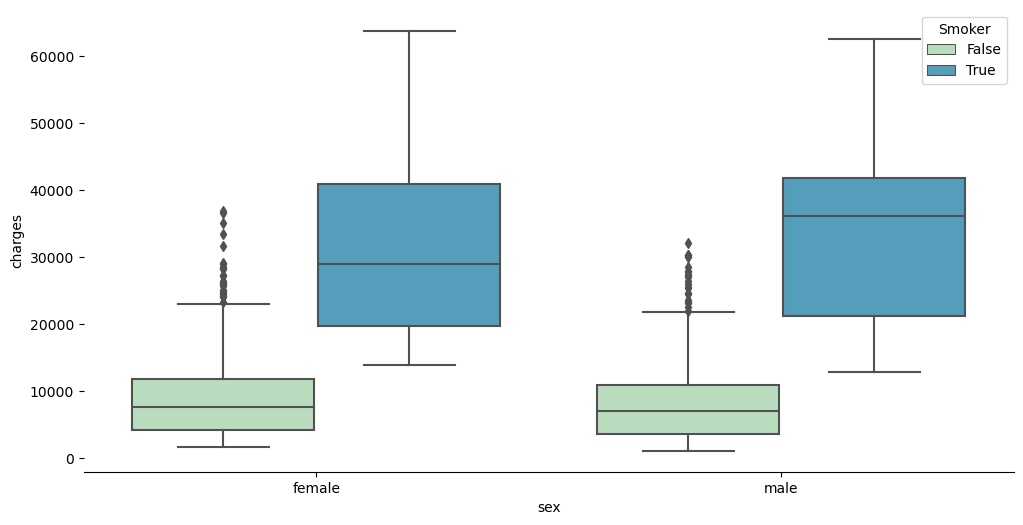

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(x = "sex", y = "charges", data  =df, palette = "GnBu" , hue = "Smoker") 
sns.despine(left = True) 

<Axes: xlabel='age', ylabel='charges'>

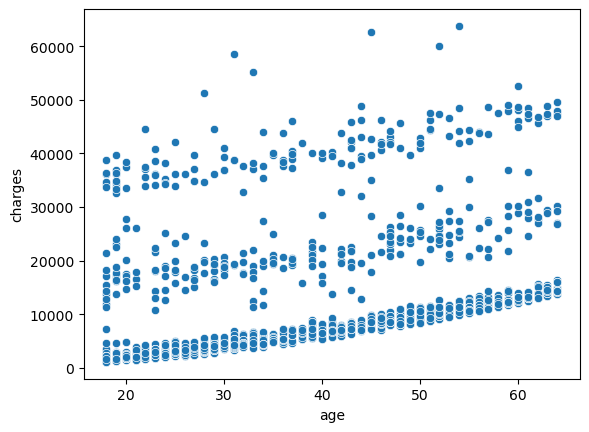

In [21]:
sns.scatterplot(x = "age", y = "charges", data  =df)

``Analyse region-wise.``

<Axes: xlabel='age', ylabel='charges'>

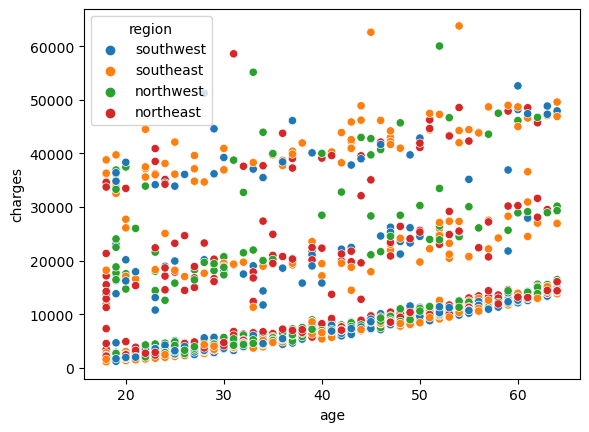

In [25]:
sns.scatterplot(x = "age", y = "charges", data  =df, hue = "region")

<Axes: xlabel='age', ylabel='charges'>

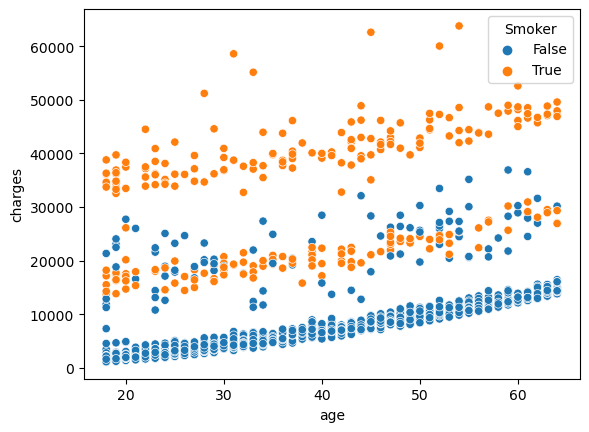

In [27]:
sns.scatterplot(x = "age", y = "charges", data  =df, hue = "Smoker")

``Charges increase for younger who smokes.``

``Comparing on BMI Basis.``

<Axes: xlabel='bmi', ylabel='charges'>

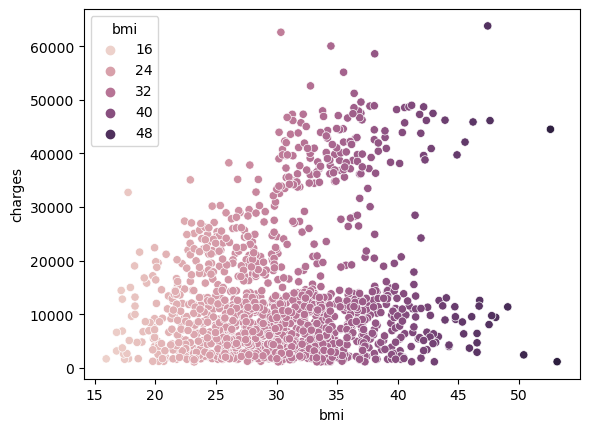

In [30]:
sns.scatterplot(x = "bmi", y = "charges", data  =df, hue = "bmi")

<Axes: xlabel='bmi', ylabel='charges'>

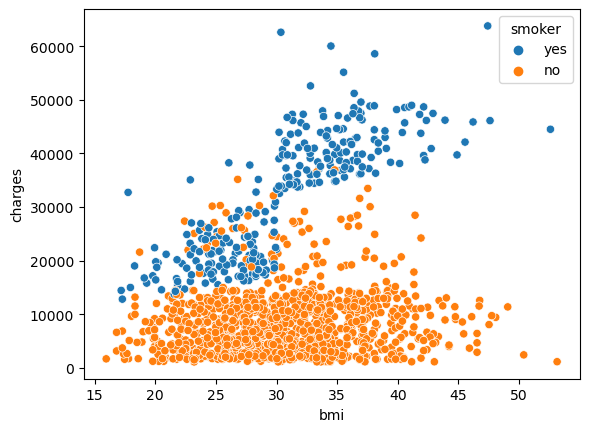

In [32]:
sns.scatterplot(x = "bmi", y = "charges", data  =df, hue = "smoker")

##### To see both the graphs together.

<Axes: xlabel='bmi', ylabel='charges'>

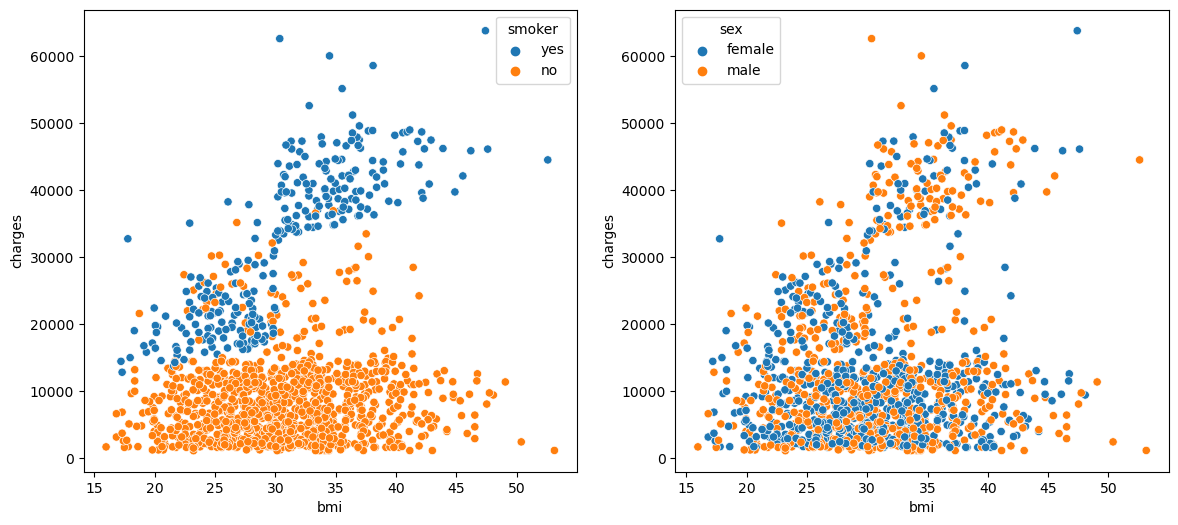

In [34]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 6))
sns.scatterplot(x = "bmi", y = "charges", data  =df, hue = "smoker", ax = ax[0])
sns.scatterplot(x = "bmi", y = "charges", data  =df, hue = "sex", ax = ax[1])

In [35]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,False,True,False,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False,False,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False,False,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False,True,False,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False,True,False,False


In [40]:
# remove useless parameters
df.drop(['sex', 'smoker', 'region'], axis = 1, inplace = True)

In [41]:
df.head()

,age,bmi,children,charges,male,Smoker,northwest,southeast,southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


<Axes: >

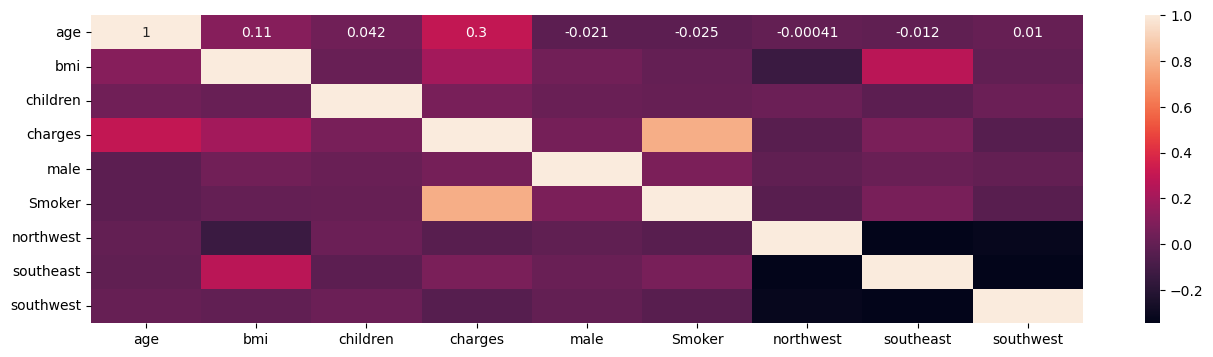

In [42]:
plt.figure(figsize = (16, 4))
sns.heatmap(df.corr(), annot = True)

In [43]:
df.corr()

,age,bmi,children,charges,male,Smoker,northwest,southeast,southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
Smoker,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


## Splitting the Data

In [45]:
x = df.drop('charges', axis = 1)
y = df['charges']

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40)

In [47]:
x_train.shape

(802, 8)

In [48]:
x_test.shape

(536, 8)

## Scaling the data

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [63]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.fit_transform(x_test)

In [64]:
scaled_x_train

array([[ 1.48989914, -0.34965447, -0.87417112, ..., -0.5610295 ,
        -0.60520176, -0.55334341],
       [ 1.56122363,  1.38872614,  0.80507496, ..., -0.5610295 ,
        -0.60520176,  1.80719602],
       [-1.50572926, -0.74929171,  0.80507496, ..., -0.5610295 ,
         1.65234154, -0.55334341],
       ...,
       [-1.50572926,  0.52491398, -0.87417112, ..., -0.5610295 ,
         1.65234154, -0.55334341],
       [-0.57851095, -0.82210346, -0.87417112, ..., -0.5610295 ,
         1.65234154, -0.55334341],
       [-1.14910683,  0.98660668,  0.80507496, ..., -0.5610295 ,
        -0.60520176, -0.55334341]])

## Support Vector Regression Model

In [65]:
from sklearn.svm import SVR

regressor = SVR()
regressor.fit(scaled_x_train, y_train)

SVR()

In [66]:
predict = regressor.predict(scaled_x_test)

In [67]:
predict.shape

(536,)

In [68]:
y_test.shape

(536,)

In [69]:
predict[:10]

array([9218.76585672, 9247.71806121, 9191.91894689, 9193.94827708,
       9184.24254033, 9233.1424932 , 9258.60316918, 9186.59063823,
       9232.3824545 , 9228.9435957 ])

In [70]:
y_test[:10]

601      9174.13565
1011    18767.73770
220      5012.47100
154      7077.18940
429     18804.75240
371     12029.28670
11      27808.72510
732      4234.92700
73      11946.62590
438     12592.53450
Name: charges, dtype: float64